## Laboratorio Desafio 1 - Version 0,0001

### Bastian Rojas Pereira

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [3]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [5]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target

In [7]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construcción del Modelo MLP

In [9]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [11]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

C:\Users\basti\anaconda3\envs\anaconda-toolbox\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Crear el modelo MLP con Dropout + Regularización L2
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Capa de salida

In [15]:
# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación del Modelo

In [17]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del Modelo

In [19]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2900 - loss: 3.3495 - val_accuracy: 0.4167 - val_loss: 1.9995
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2353 - loss: 3.1159 - val_accuracy: 0.4167 - val_loss: 1.9679
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 2.9291 - val_accuracy: 0.4167 - val_loss: 1.9331
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4079 - loss: 3.1982 - val_accuracy: 0.4167 - val_loss: 1.8935
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 2.7904 - val_accuracy: 0.4167 - val_loss: 1.8590
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4498 - loss: 2.1935 - val_accuracy: 0.4167 - val_loss: 1.8240
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2728 - loss: 2.8212 - val_accuracy: 0.4167 - val_loss: 1.7982
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3317 - loss: 2.5088 - val_accuracy: 0.4167 - val_loss

## Evaluación del Modelo

In [21]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3667 - loss: 1.2634
Precisión en el conjunto de prueba: 36.67%


In [23]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3667 - loss: 1.2634
Precisión en el conjunto de prueba: 36.67%


## Guardar y Cargar el Modelo

In [25]:
# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')

## Visualización de Resultados

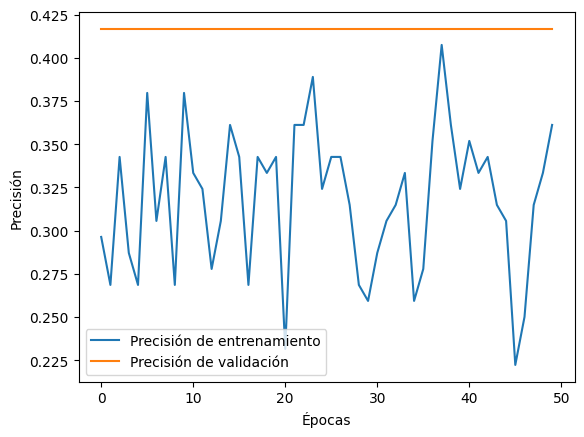

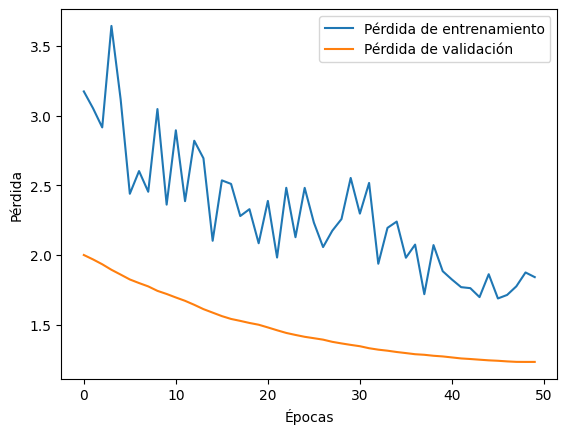

In [27]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## **Pregunta:**

### - ¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

#### Tasa de aprendizaje alta (0.01): Puede causar que el modelo aprenda demasiado rápido, posiblemente sobrepasando mínimos óptimos, lo que podría llevar a una precisión errática y una alta pérdida debido a la inestabilidad en la convergencia.
#### Tasa de aprendizaje baja (0.0001): Fomenta un aprendizaje más lento y estable, reduciendo el riesgo de sobrepasar los mínimos, pero puede ser insuficiente para converger a una solución óptima en un número razonable de épocas, lo que puede resultar en una precisión más baja y una pérdida más alta si el entrenamiento no es suficiente.